In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("titanic.csv")

In [3]:
data = data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

In [4]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [5]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])

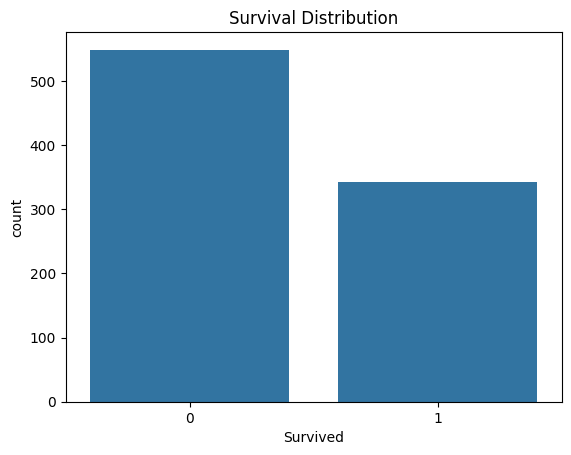

In [6]:
sns.countplot(x='Survived', data=data)
plt.title("Survival Distribution")
plt.show()

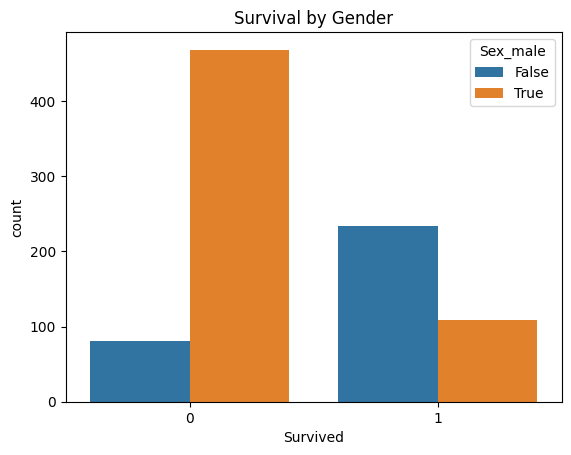

In [7]:
sns.countplot(x='Survived', hue='Sex_male', data=data)
plt.title("Survival by Gender")
plt.show()

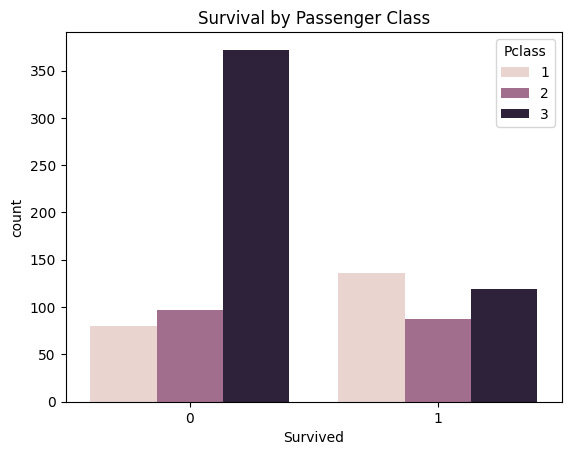

In [8]:
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title("Survival by Passenger Class")
plt.show()

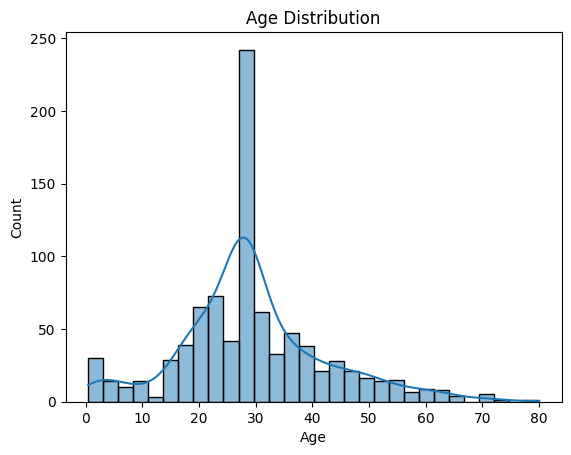

In [9]:
sns.histplot(data['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

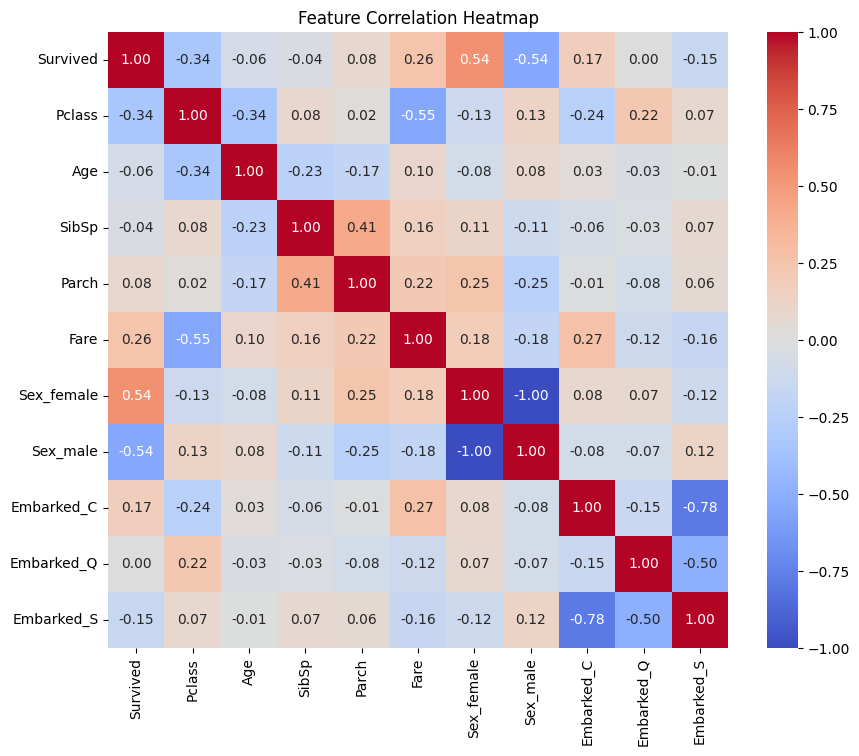

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [15]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8156424581005587
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

